## Classification Algorithms

1) Binary Classification eg (True or False,Churn prediction)
2) Multilabel Classification eg (Image Classification, )

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784',as_frame=False)

In [3]:
mnist.data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
mnist.data.shape

(70000, 784)

In [6]:
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [3]:
import matplotlib.pyplot as plt

In [4]:
def DisplayHandwrittenImage(image_data):

    image=image_data.reshape(28,28)

    plt.imshow(image,cmap='binary')

    plt.axis('off')

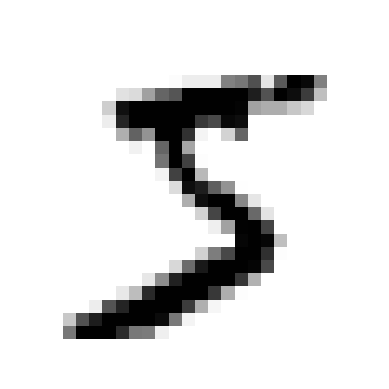

In [5]:
some_img =mnist.data[0]

DisplayHandwrittenImage(some_img)

In [12]:
mnist.target[0]

'5'

## Binary Classification

In [6]:
X = mnist.data
y = mnist.target

In [7]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [15]:
y_train_5 = (y_train == '5')

y_test_5 = (y_test == '5')

In [16]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [17]:
# Stochastic Gradient Model

from sklearn.linear_model import SGDClassifier

In [18]:
sgd_model = SGDClassifier(random_state=42)

In [19]:
sgd_model.fit(X_train,
              y_train_5)

SGDClassifier(random_state=42)

In [20]:
sgd_model.predict([some_img])

array([ True])

In [21]:
sgd_model.predict([X_train[1]])

array([False])

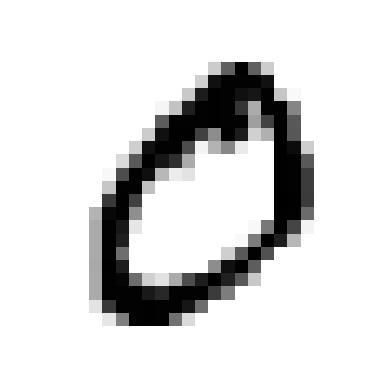

In [22]:
DisplayHandwrittenImage(X_train[1])

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
score_cv = cross_val_score(sgd_model,X_train[:10000],y_train_5[:10000],cv=3,scoring='accuracy')

In [25]:
score_cv

array([0.94181164, 0.96129613, 0.92349235])

In [27]:
# from sklearn.model_selection import cross_val_predict

y_train_pred = sgd_model.predict(X_train)

In [26]:
from sklearn.metrics import confusion_matrix

In [28]:
cm = confusion_matrix(y_train_5,y_train_pred)

In [29]:
cm

array([[52316,  2263],
       [  601,  4820]], dtype=int64)

In [30]:
precision = (4820/(4820+2263))

In [31]:
precision

0.6805026118876183

In [32]:
recall = (4820/(4820+601))

In [33]:
recall

0.8891348459693783

In [34]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [35]:
precision_score(y_train_5,y_train_pred)

0.6805026118876183

In [36]:
recall_score(y_train_5,y_train_pred)

0.8891348459693783

In [37]:
f1_score(y_train_5,y_train_pred)

0.7709532949456174

In [39]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

In [40]:
y_scores = cross_val_predict(sgd_model,X_train,y_train_5,cv=3,method='decision_function')

In [41]:
precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

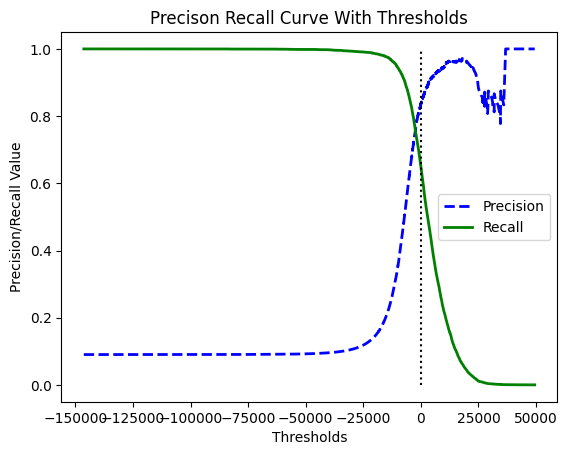

In [43]:
plt.plot(thresholds, precisions[:-1],'b--',label='Precision',linewidth=2)
plt.plot(thresholds, recalls[:-1],'g-',label='Recalls',linewidth=2)
plt.vlines(0, 0,1.0, 'k','dotted',label='Threshold')
plt.xlabel('Thresholds')
plt.ylabel('Precision/Recall Value')
plt.legend(['Precision',"Recall"])
plt.title('Precison Recall Curve With Thresholds')
plt.show()

In [44]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [45]:
y_pred_90_precision = (y_scores>12000)

In [46]:
precision_score(y_train_5,
                y_pred_90_precision)

0.9629237288135594

In [47]:
recall_score(y_train_5,y_pred_90_precision)

0.16768123962368567

## MultiLabel Classification

In [8]:
from sklearn.svm import SVC

In [9]:
svc_clf = SVC(random_state=42)

In [10]:
svc_clf.fit(X_train,y_train)

SVC(random_state=42)

In [11]:
svc_clf.predict([X_train[0]])

array(['5'], dtype=object)

In [12]:
svc_clf.predict([X_train[1]])

array(['0'], dtype=object)

In [13]:
svc_clf.decision_function([X_train[0]])

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [14]:
svc_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
y_pred = svc_clf.predict(X_test)

In [17]:
accuracy_score(y_test,y_pred)

0.9792